![image.png](attachment:image.png)

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com  alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:


- Mês (já na base)
- Semestre (já na base)
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [ ]:
datas = pd.date_range('01/01/2020', periods=24, freq='MS')
ts = pd.Series(list(range(6))*4, index=datas)
ts

2020-01-01    0
2020-02-01    1
2020-03-01    2
2020-04-01    3
2020-05-01    4
2020-06-01    5
2020-07-01    0
2020-08-01    1
2020-09-01    2
2020-10-01    3
2020-11-01    4
2020-12-01    5
2021-01-01    0
2021-02-01    1
2021-03-01    2
2021-04-01    3
2021-05-01    4
2021-06-01    5
2021-07-01    0
2021-08-01    1
2021-09-01    2
2021-10-01    3
2021-11-01    4
2021-12-01    5
Freq: MS, dtype: int64

In [ ]:
mes = pd.to_datetime(mes)

In [ ]:
mes.dt.month

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
13     2
14     3
15     4
16     5
17     6
18     7
19     8
20     9
21    10
22    11
23    12
dtype: int64

In [ ]:
cinco = pd.qcut(df['Valor NF'], 5)

In [ ]:
dez = pd.qcut(df['Valor NF'], 10)

In [ ]:
vinte = pd.qcut(df['Valor NF'], 20)

In [ ]:
cinquenta = pd.qcut(df['Valor NF'], 50)

In [ ]:
ano = pd.to_datetime(df['Ano'])

In [ ]:
semestre = pd.to_datetime(df['Semestre'])

In [ ]:
df.drop(columns=['Data Registro', 'CNPJ emit.', 'No.'], inplace=True)
metadados = pd.DataFrame({'dtype':df.dtypes})
metadados

,dtype
Emitente,object
Data Emissão,datetime64[ns]
Valor NF,float64
Créditos,float64
Situação do Crédito,category
Ano,int64
Semestre,int64
Retorno,float64
flag_credito,int64
categoria,object


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [ ]:
metadados['papel'] = 'covariavel'
metadados.loc['Emitente','papel'] = 'resposta'
metadados['nunique'] = df.nunique()
metadados

,dtype,papel,nunique
Emitente,object,resposta,15575
Data Emissão,datetime64[ns],covariavel,1815
Valor NF,float64,covariavel,33658
Créditos,float64,covariavel,9717
Situação do Crédito,category,covariavel,3
Ano,int64,covariavel,5
Semestre,int64,covariavel,2
Retorno,float64,covariavel,60202
flag_credito,int64,covariavel,2
categoria,object,covariavel,9


In [ ]:
tab = pd.crosstab(df.Ano, df.flag_credito, margins=True, margins_name='total')
tab

flag_credito,0,1,total
Ano,,,
2017,26190,17418,43608
2018,4746,4873,9619
2019,22446,25029,47475
2020,24686,17514,42200
2021,24940,19804,44744
total,103008,84638,187646


In [ ]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

iv = IV(df.Ano, df.flag_credito)
iv

0.04165095126406704

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'nunique']<5):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df['Valor NF'], 5), df.flag_credito)
    else: 
        metadados.loc[var, 'IV'] = IV(df[var], df.flag_credito)
    
metadados

,dtype,papel,nunique,IV
Emitente,object,resposta,15575,NaN
Data Emissão,datetime64[ns],covariavel,1815,inf
Valor NF,float64,covariavel,33658,inf
Créditos,float64,covariavel,9717,inf
Situação do Crédito,category,covariavel,3,0.056695
Ano,int64,covariavel,5,0.041651
Semestre,int64,covariavel,2,0.056695
Retorno,float64,covariavel,60202,inf
flag_credito,int64,covariavel,2,0.056695
categoria,object,covariavel,9,0.408313


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

In [ ]:
print('As variaveis que apresentam maior poder de discriminação são: Situação do Crédito, flag_credito e Semestre.')

As variaveis que apresentam maior poder de discriminação são: Situação do Crédito, flag_credito e Semestre.


In [ ]:
print('Sim, pois variaveis como Retorno, o IV retorna como infinito.')

Sim, pois variaveis como Retorno, o IV retorna como infinito.


## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize semestre como agregação (ou uma média móvel por semestre, como preferir) e avalie:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [ ]:
df.groupby(['Retorno', 'Semestre', 'Ano']).count()

Emitente  Data Emissão  Valor NF  Créditos  \
Retorno    Semestre Ano                                                
0.000000   1        2017     16467         16467     16467     16467   
                    2018       918           918       918       918   
                    2019      3944          3944      3944      3944   
                    2020     11990         11990     11990     11990   
                    2021     10827         10827     10827     10827   
...                            ...           ...       ...       ...   
25.330275  1        2020         1             1         1         1   
34.161937  2        2019         1             1         1         1   
35.851351  2        2019         1             1         1         1   
51.330000  1        2019         1             1         1         1   
941.600000 1        2021         1             1         1         1   

                          Situação do Crédito  flag_credito  categoria  
Retorno    Semestre Ano                                                 
0.000000   1        2017                16467         16467      16467  
                    2018                  918           918        918  
                    2019                 3944          3944       3944  
                    2020                11990         11990      11990  
                    2021                10827         10827      10827  
...                                       ...           ...        ...  
25.330275  1        2020                    1             1          1  
34.161937  2        2019                    1             1          1  
35.851351  2        2019                    1             1          1  
51.330000  1        2019                    1             1          1  
941.600000 1        2021                    1             1          1  

[64550 rows x 7 columns]

In [ ]:
 df.groupby(['Retorno','Semestre','Ano', 'categoria']).count()

CNPJ emit.  Emitente   No.  \
Retorno    Semestre Ano  categoria                                  
0.000000   1        2017 Alimentos             23        23    23   
                         Auto posto          1334      1334  1334   
                         Construção          2065      2065  2065   
                         Farmácia             874       874   874   
                         Mercado             2361      2361  2361   
...                                           ...       ...   ...   
25.330275  1        2020 Restaurantes           1         1     1   
34.161937  2        2019 Mercado                1         1     1   
35.851351  2        2019 não definido           1         1     1   
51.330000  1        2019 não definido           1         1     1   
941.600000 1        2021 não definido           1         1     1   

                                       Data Emissão  Valor NF  Data Registro  \
Retorno    Semestre Ano  categoria                                             
0.000000   1        2017 Alimentos               23        23             23   
                         Auto posto            1334      1334           1334   
                         Construção            2065      2065           2065   
                         Farmácia               874       874            874   
                         Mercado               2361      2361           2361   
...                                             ...       ...            ...   
25.330275  1        2020 Restaurantes             1         1              1   
34.161937  2        2019 Mercado                  1         1              1   
35.851351  2        2019 não definido             1         1              1   
51.330000  1        2019 não definido             1         1              1   
941.600000 1        2021 não definido             1         1              1   

                                       Créditos  Situação do Crédito  \
Retorno    Semestre Ano  categoria                                     
0.000000   1        2017 Alimentos           23                   23   
                         Auto posto        1334                 1334   
                         Construção        2065                 2065   
                         Farmácia           874                  874   
                         Mercado           2361                 2361   
...                                         ...                  ...   
25.330275  1        2020 Restaurantes         1                    1   
34.161937  2        2019 Mercado              1                    1   
35.851351  2        2019 não definido         1                    1   
51.330000  1        2019 não definido         1                    1   
941.600000 1        2021 não definido         1                    1   

                                       flag_credito  
Retorno    Semestre Ano  categoria                   
0.000000   1        2017 Alimentos               23  
                         Auto posto            1334  
                         Construção            2065  
                         Farmácia               874  
                         Mercado               2361  
...                                             ...  
25.330275  1        2020 Restaurantes             1  
34.161937  2        2019 Mercado                  1  
35.851351  2        2019 não definido             1  
51.330000  1        2019 não definido             1  
941.600000 1        2021 não definido             1  

[66114 rows x 9 columns]

In [ ]:
df.groupby(['Créditos', 'flag_credito', 'Semestre', 'Ano', 'categoria']).count()


Emitente  Data Emissão  \
Créditos flag_credito Semestre Ano  categoria                              
0.0      0            1        2017 Alimentos           23            23   
                                    Auto posto        1334          1334   
                                    Construção        2065          2065   
                                    Farmácia           874           874   
                                    Mercado           2362          2362   
...                                                    ...           ...   
290.9    1            2        2021 Mercado              7             7   
                                    Restaurantes         1             1   
                                    Varejo               4             4   
                                    Vestuário           26            26   
                                    não definido       101           101   

                                                  Valor NF  \
Créditos flag_credito Semestre Ano  categoria                
0.0      0            1        2017 Alimentos           23   
                                    Auto posto        1334   
                                    Construção        2065   
                                    Farmácia           874   
                                    Mercado           2362   
...                                                    ...   
290.9    1            2        2021 Mercado              7   
                                    Restaurantes         1   
                                    Varejo               4   
                                    Vestuário           26   
                                    não definido       101   

                                                  Situação do Crédito  Retorno  
Créditos flag_credito Semestre Ano  categoria                                   
0.0      0            1        2017 Alimentos                      23       23  
                                    Auto posto                   1334     1334  
                                    Construção                   2065     2065  
                                    Farmácia                      874      874  
                                    Mercado                      2362     2361  
...                                                               ...      ...  
290.9    1            2        2021 Mercado                         7        7  
                                    Restaurantes                    1        1  
                                    Varejo                          4        4  
                                    Vestuário                      26       26  
                                    não definido                  101      101  

[39145 rows x 5 columns]

In [ ]:
tempo = pd.crosstab(df['categoria'], df['Ano'])
tempo

Ano,2017,2018,2019,2020,2021
categoria,,,,,
Alimentos,4946,324,4643,2498,2549
Auto posto,2489,217,444,268,271
Construção,3217,829,12144,7710,8336
Farmácia,1952,354,2448,4882,5304
Mercado,3908,3882,7349,13799,13757
Restaurantes,24773,2250,10548,1190,988
Varejo,77,105,656,2248,2818
Vestuário,170,354,1168,859,1061
não definido,2076,1304,8075,8746,9660


## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [ ]:
tab = tempo
tab['N'] = tab.sum(axis=1)
tab['tx_evento'] = tab[2020]/tab[2021]
tab.reset_index()
tab.head()

Ano,2017,2018,2019,2020,2021,N,tx_evento
categoria,,,,,,,
Alimentos,4946,324,4643,2498,2549,44880,0.979992
Auto posto,2489,217,444,268,271,11067,0.988930
Construção,3217,829,12144,7710,8336,96708,0.924904
Farmácia,1952,354,2448,4882,5304,44820,0.920437
Mercado,3908,3882,7349,13799,13757,128085,1.003053


In [ ]:
rotulo_ev, rotulo_nev = (2020, 2021 )

tab['pct_evento']     = tab[rotulo_ev]/tab[rotulo_ev].groupby(level=0).sum()
tab['pct_nao_evento'] = tab[rotulo_nev]/tab[rotulo_nev].groupby(level=0).sum()
tab['WOE'] = np.log(tab.pct_evento/tab.pct_nao_evento)
tab.head()

Ano,2017,2018,2019,2020,2021,N,tx_evento,pct_evento,pct_nao_evento,WOE
categoria,,,,,,,,,,
Alimentos,4946,324,4643,2498,2549,44880,0.979992,1.0,1.0,0.0
Auto posto,2489,217,444,268,271,11067,0.988930,1.0,1.0,0.0
Construção,3217,829,12144,7710,8336,96708,0.924904,1.0,1.0,0.0
Farmácia,1952,354,2448,4882,5304,44820,0.920437,1.0,1.0,0.0
Mercado,3908,3882,7349,13799,13757,128085,1.003053,1.0,1.0,0.0


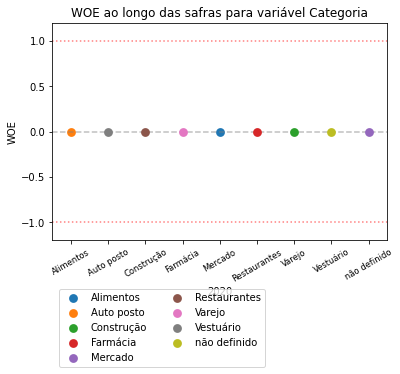

In [ ]:
fig, ax = plt.subplots()
variavel='categoria'

sns.pointplot(data=tab.reset_index(), y = 'WOE', x = 2020 , hue=variavel, ax=ax);

labs = tab.index.get_level_values(level=0).unique()

ax.set_xticklabels(labs,rotation=30, fontsize='small')
ax.legend(bbox_to_anchor=(.65, -.2), ncol=2)

ymax = max(1.2, max(tab.WOE))
ymin = min(-1.2, min(tab.WOE))
ax.set_ylim([ymin, ymax])

ax.axhline(1, linestyle=':'  , color='red', alpha=.5)
ax.axhline(0, linestyle='--' , color='grey', alpha=.5)
ax.axhline(-1, linestyle=':' , color='red', alpha=.5)

ax.set_title(f'WOE ao longo das safras para variável {variavel.capitalize()}');

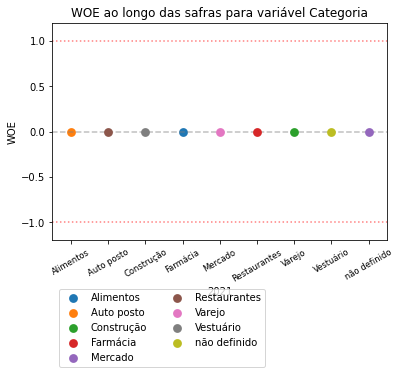

In [ ]:
fig, ax = plt.subplots()
variavel='categoria'

sns.pointplot(data=tab.reset_index(), y = 'WOE', x = 2021 , hue=variavel, ax=ax);

labs = tab.index.get_level_values(level=0).unique()

ax.set_xticklabels(labs,rotation=30, fontsize='small')
ax.legend(bbox_to_anchor=(.65, -.2), ncol=2)

ymax = max(1.2, max(tab.WOE))
ymin = min(-1.2, min(tab.WOE))
ax.set_ylim([ymin, ymax])

ax.axhline(1, linestyle=':'  , color='red', alpha=.5)
ax.axhline(0, linestyle='--' , color='grey', alpha=.5)
ax.axhline(-1, linestyle=':' , color='red', alpha=.5)

ax.set_title(f'WOE ao longo das safras para variável {variavel.capitalize()}');

In [ ]:
tab.head()

Ano,2017,2018,2019,2020,2021,N,tx_evento,pct_evento,pct_nao_evento,WOE
categoria,,,,,,,,,,
Alimentos,4946,324,4643,2498,2549,44880,0.979992,1.0,1.0,0.0
Auto posto,2489,217,444,268,271,11067,0.988930,1.0,1.0,0.0
Construção,3217,829,12144,7710,8336,96708,0.924904,1.0,1.0,0.0
Farmácia,1952,354,2448,4882,5304,44820,0.920437,1.0,1.0,0.0
Mercado,3908,3882,7349,13799,13757,128085,1.003053,1.0,1.0,0.0


In [ ]:
((tab.pct_evento - tab.pct_nao_evento)*tab.WOE)

categoria
Alimentos       0.0
Auto posto      0.0
Construção      0.0
Farmácia        0.0
Mercado         0.0
Restaurantes    0.0
Varejo          0.0
Vestuário       0.0
não definido    0.0
dtype: float64

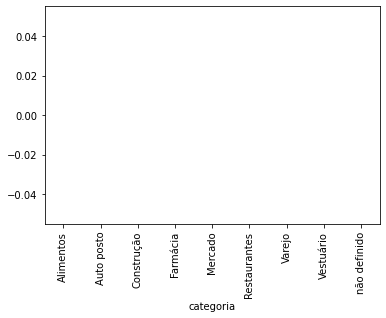

In [ ]:
iv_categoria = ((tab.pct_evento - tab.pct_nao_evento)*tab.WOE).groupby(level=0).sum();
iv_categoria.plot.bar()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

As categorias não definidas e Restaurantes

As diferenças não são estaveis no tempo